In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch # библиотека для работы с нейронными сетями

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [0]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [0]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [0]:
X = digits['data']
Y = digits['target']

In [0]:
X.shape

(1797, 64)

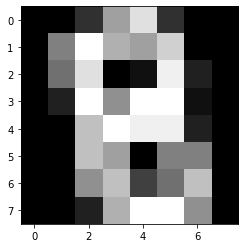

In [0]:
plt.gray()
plt.imshow(X[500,:].reshape(8, 8))

In [0]:
Y[500]

8

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

Простая модель

In [0]:
model = torch.nn.Sequential(
    torch.nn.Linear(64, 256), # 256 -- количество нейронов в линейном слое
    torch.nn.LeakyReLU(),
    torch.nn.Linear(256, 10)
)

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
loss = torch.nn.CrossEntropyLoss()

In [0]:
BATCH_SIZE = 8
loss_history = [] # ошибки после каждого прогона

for i in range(len(X_train) // BATCH_SIZE):
  X_batch = X_train[i * BATCH_SIZE : (i+1) * BATCH_SIZE]
  y_batch = y_train[i * BATCH_SIZE : (i+1) * BATCH_SIZE]

  # torch.tensor -- формат, понятный torch
  X_batch = torch.tensor(X_batch)
  y_batch = torch.tensor(y_batch)

  # прогоняем батч через нейронную сеть
  nn_output = model(X_batch.float()) # .float() -- чтобы без ошибки
  # функция ошибки
  computed_loss = loss(nn_output, y_batch)
  # добавим в историю ошибок
  loss_history.append(computed_loss.data.numpy())

  print('Step: ', str(i), ' -- loss is ', str(computed_loss.data.numpy()))

  # стандартные команды torch для обучения
  computed_loss.backward()
  optimizer.step()
  optimizer.zero_grad() # математическое условие сходимости к минимуму

Step:  0  -- loss is  3.1052914
Step:  1  -- loss is  3.6694412
Step:  2  -- loss is  3.5005336
Step:  3  -- loss is  2.8529613
Step:  4  -- loss is  2.5919182
Step:  5  -- loss is  2.2046587
Step:  6  -- loss is  2.3846838
Step:  7  -- loss is  2.4821424
Step:  8  -- loss is  2.2007103
Step:  9  -- loss is  2.3587847
Step:  10  -- loss is  1.9457934
Step:  11  -- loss is  1.8766103
Step:  12  -- loss is  1.3850582
Step:  13  -- loss is  1.4694431
Step:  14  -- loss is  2.4925623
Step:  15  -- loss is  2.0168424
Step:  16  -- loss is  1.5226643
Step:  17  -- loss is  2.0112228
Step:  18  -- loss is  1.1317617
Step:  19  -- loss is  0.9593946
Step:  20  -- loss is  1.1414422
Step:  21  -- loss is  1.0333399
Step:  22  -- loss is  0.9931321
Step:  23  -- loss is  1.5105004
Step:  24  -- loss is  0.71253186
Step:  25  -- loss is  0.9798255
Step:  26  -- loss is  1.3416811
Step:  27  -- loss is  1.2786632
Step:  28  -- loss is  0.52184665
Step:  29  -- loss is  0.4873861
Step:  30  -- loss

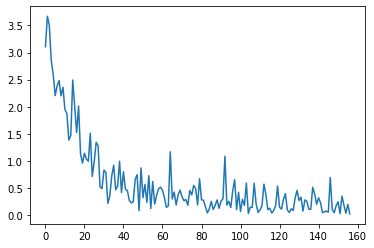

In [0]:
plt.plot(np.arange(len(loss_history)), loss_history)

In [0]:
# чтобы работал оптимизатор, вынесем слой отдельно
softmax = torch.nn.Softmax(dim=1)

output_probabilities = softmax(model(torch.tensor(X_test).float()))

In [0]:
output_probabilities[0]
# 2.9006e-04 = 2.9006 * 10^(-4)

tensor([2.9006e-04, 1.3138e-03, 1.9780e-04, 3.4391e-03, 9.3359e-06, 2.4752e-04,
        4.5266e-05, 1.4181e-04, 3.9245e-03, 9.9039e-01],
       grad_fn=<SelectBackward>)

In [0]:
output_probabilities[0] == max(output_probabilities[0])
# 9.9039e-01 = 9.9039 * 10^(-1) = 0.99039 = 99% -- вероятность того, что это цифра 9

tensor([False, False, False, False, False, False, False, False, False,  True])

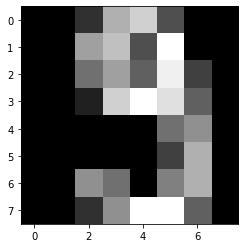

In [0]:
plt.imshow(X_test[0, :].reshape(8, 8))

In [0]:
y_test[0]

9

In [0]:
output_probabilities[100]

tensor([3.2039e-03, 4.4982e-04, 2.0824e-05, 1.1835e-05, 9.8277e-01, 3.4916e-06,
        7.7117e-04, 5.9266e-03, 6.8199e-03, 1.9098e-05],
       grad_fn=<SelectBackward>)

In [0]:

output_probabilities[100] == max(output_probabilities[100])

tensor([False, False, False, False,  True, False, False, False, False, False])

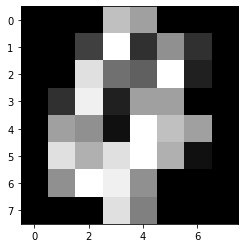

In [0]:
plt.imshow(X_test[100, :].reshape(8, 8))

In [0]:
y_test[100]

4

Более продвинутая модель

In [0]:
cool